In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Data_Train (1).xlsx')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
((data.isnull()).sum()/len(data))*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

#### Imputing missing values 

In [4]:
data['Mileage']= data['Mileage'].fillna('0 kmpl')
data['Engine']= data['Engine'].fillna('0 CC')
data['Power'] = data['Power'].fillna('0 bph')
data['Seats'] = data['Seats'].fillna('0 Seats')

In [5]:
data = data.drop('New_Price',axis=1)# New_price has more than 80 % of missing values

In [6]:
(data.isnull().sum())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [7]:
data['Name'].nunique()

1876

In [8]:
data = data.drop('Name',axis = 1) # if we encode 1876 names then it will be meaning less 

In [9]:
data['Location'].nunique()

11

In [10]:
from sklearn.preprocessing import LabelEncoder,Normalizer,StandardScaler

In [11]:
le =LabelEncoder()
data['Location'] = le.fit_transform(data['Location'])
data['Fuel_Type'] = le.fit_transform(data['Fuel_Type'])
data['Transmission'] = le.fit_transform(data['Transmission'])
data['Owner_Type'] = le.fit_transform(data['Owner_Type'])

In [12]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5,1.75
1,10,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5,12.50
2,2,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,5,4.50
3,2,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7,6.00
4,3,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5,17.74


In [13]:
data['Mileage']=data['Mileage'].apply(lambda x: x.split(" ")[0])
data['Power']=data['Power'].apply(lambda x: x.split(" ")[0])
data['Engine']=data['Engine'].apply(lambda x: x.split(" ")[0])
data['Seats'] = data['Seats'].apply(str)
data['Seats']=data['Seats'].apply(lambda x: x.split(" ")[0])

In [14]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,2010,72000,0,1,0,26.6,998,58.16,5.0,1.75
1,10,2015,41000,1,1,0,19.67,1582,126.2,5.0,12.50
2,2,2011,46000,4,1,0,18.2,1199,88.7,5.0,4.50
3,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,3,2013,40670,1,0,2,15.2,1968,140.8,5.0,17.74


In [15]:
data.dtypes

Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage               object
Engine                object
Power                 object
Seats                 object
Price                float64
dtype: object

In [16]:
data['Mileage']= data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(int)
data['Power'] = data['Power'].apply(lambda x : float(x) if x != 'null' else 0.0) #np.nan
data['Seats'] = data['Seats'].astype(float)

In [17]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,2010,72000,0,1,0,26.60,998,58.16,5.0,1.75
1,10,2015,41000,1,1,0,19.67,1582,126.20,5.0,12.50
2,2,2011,46000,4,1,0,18.20,1199,88.70,5.0,4.50
3,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,3,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74


In [18]:
data['Power'].nunique()

370

In [13]:
from matplotlib import pyplot as plt
plt.hist(data['Price'])

(array([5.098e+03, 6.190e+02, 2.000e+02, 6.400e+01, 2.900e+01, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.44 ,  16.396,  32.352,  48.308,  64.264,  80.22 ,  96.176,
        112.132, 128.088, 144.044, 160.   ]),
 <a list of 10 Patch objects>)

(array([  33.,  160.,  584., 1619., 1804.,  835.,  550.,  340.,   87.,
           7.]),
 array([-0.82098055, -0.23136512,  0.35825032,  0.94786576,  1.53748119,
         2.12709663,  2.71671207,  3.30632751,  3.89594294,  4.48555838,
         5.07517382]),
 <a list of 10 Patch objects>)

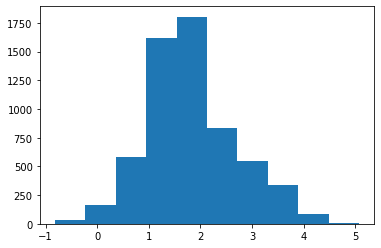

In [20]:
# getting the dependent variable into normal form
plt.hist(np.log(data['Price']))

##### Building Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split

In [22]:
X = data.drop(['Price','Kilometers_Driven','Seats','Owner_Type'],axis=1)# indipendent variables 
Y = np.log(data['Price']) # dependent variables 

In [23]:
X.head()

,Location,Year,Fuel_Type,Transmission,Mileage,Engine,Power
0,9,2010,0,1,26.60,998,58.16
1,10,2015,1,1,19.67,1582,126.20
2,2,2011,4,1,18.20,1199,88.70
3,2,2012,1,1,20.77,1248,88.76
4,3,2013,1,0,15.20,1968,140.80


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [25]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [26]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred = lr.predict(X_test)

##### Residual plot

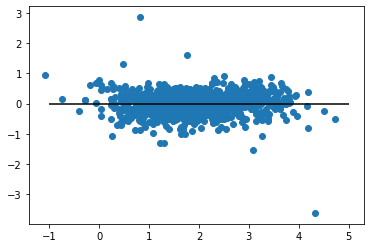

In [28]:
plt.scatter(y_pred,(y_test-y_pred))
plt.hlines(y=0,xmin=-1,xmax=5)

In [29]:
r_square = r2_score(y_pred,y_test)
r_square

0.815209947678871

In [30]:
mean_squared_error(y_pred,y_test)

0.119006355138834

In [31]:
np.exp(y_pred)

array([ 4.12439097, 12.27355732, 10.26578448, ...,  4.35082715,
       12.65555941,  2.23879882])

In [32]:
np.exp(y_test.values)

array([ 5.75, 10.08,  7.85, ...,  6.93,  5.38,  1.99])

In [33]:
lso = Lasso()
lso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
y_pred_lasso = lso.predict(X_test)

In [35]:
r2_score(y_pred_lasso,y_test)

-1.5786818430664495e+31

#### Using Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
ds = DecisionTreeRegressor()

In [38]:
ds.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:

y_pred1 = ds.predict(X_test)

In [40]:
y_test.values

array([1.74919985, 2.31055326, 2.06051353, ..., 1.93585981, 1.68268837,
       0.68813464])

In [41]:
r2_score(y_pred1,y_test)

0.8679155373017174

#### Using KNN for Regression

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

In [43]:
knr.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [44]:
y_pred_knr = knr.predict(X_test)
y_pred_knr

array([1.73083396, 2.40907567, 1.98768836, ..., 1.98612218, 1.7117972 ,
       0.84851042])

In [45]:
r2_score(y_pred_knr,y_test)

0.8720044534736398